In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
import matplotlib.pyplot as plt
import itertools

Analysis of q_table

In [46]:
# data/q_table-task2-PaperRewards2.csv
q_path = "data/q_table-task2-PaperRewards.csv"
def open_q():
    with open(q_path, "rb") as file:
        q_table = pickle.load(file)
    print("length ", len(q_table))

    return q_table


In [48]:
q_table = open_q()
key = (2.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 13.0, 0.0, 0.0)
#h = np.around(np.array(q_table[key]), 3)
#print(h)

keys = list(q_table.keys())
val = list(q_table.values())
qq = np.array(val)


all_values = len(q_table) * 6
non_zerp = np.count_nonzero(qq)
print("NOn zero: ", np.count_nonzero(qq, axis=0))
print("Number of values: ", len(q_table) * 6)
print(
    f"Number of zero values:  {all_values - non_zerp}, and overall {(1 - (non_zerp/all_values)) *100:.2f}%")

length  24716
NOn zero:  [23326 19967 13781 10580  7490  7567]
Number of values:  148296
Number of zero values:  65585, and overall 44.23%


Clean csv from 6-element states

In [20]:
with open("/Users/angelinabasova/Library/CloudStorage/OneDrive-bwedu/bomberman_rl_dev/agent_code/OWN/q_tableSVEN.csv", "rb") as file:
    q_table = pickle.load(file)

keys = list(q_table.keys())
dictionary = {}
for (state, values) in q_table.items():
     if len(state) == 10:
         dictionary[state]= values

print(type(dictionary))
print(f"First table has {len(q_table)} states")
print(f"First table has {len(dictionary)} states")


with open("/Users/angelinabasova/Library/CloudStorage/OneDrive-bwedu/bomberman_rl_dev/agent_code/OWN/q_tableSVEN_clean.csv", "wb") as file:
    pickle.dump(dictionary, file)


<class 'dict'>
First table has 12117 states
First table has 8799 states


In [36]:
q_path_ANGELINA = "/q_tableSVEN_clean.csv"
q_path_SVEN = "q_table.csv"
q_path_TOBIAS = "q_table.csv"

with open(q_path_ANGELINA, "rb") as file:
    q_table1 = pickle.load(file)

with open(q_path_SVEN, "rb") as file:
    q_table2 = pickle.load(file)

with open(q_path_TOBIAS, "rb") as file:
    q_table3 = pickle.load(file)

print(f"1. table has {len(q_table1)} states")
print(f"2. table has {len(q_table2)} states")
print(f"3. table has {len(q_table3)} states")

#merge the three q_tables. Duplicate states are possibly overwritten by the values of one of the q_tables.
q_table1.update(q_table2)
q_table1.update(q_table3)

type(q_table1)
print(f"Final table has {len(q_table1)} states")

with open("/data/q_table-final.csv", "wb") as file:
    pickle.dump(q_table1, file)


1. table has 8799 states
2. table has 3318 states
3. table has 3318 states
Final table has 12117 states


In [385]:
ls = list(q_table.keys())

unique_val = np.zeros(10)
for i in range(10):
    objective_ouput_set = {item[i] for item in ls}
    unique_val[i] = len(objective_ouput_set)


    print(f"unique values of index {i}: {objective_ouput_set}")
    print("Num of unique values: ", len(objective_ouput_set))
    print()

num_states = np.product(unique_val)
print(f"Feature combinations: {num_states}")
print(f"Needed training iterations: {num_states/10}")
print(f"Needed training iterations per epsilon: {(num_states/10)/10}")

unique values of index 0: {0.0}
Num of unique values:  1

unique values of index 1: {0.0}
Num of unique values:  1

unique values of index 2: {0.0, 1.0}
Num of unique values:  2

unique values of index 3: {0.0, 1.0}
Num of unique values:  2

unique values of index 4: {0.0, 1.0}
Num of unique values:  2

unique values of index 5: {0.0, 1.0}
Num of unique values:  2

unique values of index 6: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, -1.0, -6.0, -5.0, -4.0, -3.0, -2.0}
Num of unique values:  13

unique values of index 7: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, -2.0, -6.0, -5.0, -4.0, -3.0, -1.0}
Num of unique values:  13

unique values of index 8: {0.0, 1.0, 2.0, 3.0, 100.0, -2.0, -1.0}
Num of unique values:  7

unique values of index 9: {0.0, 1.0, 2.0, 100.0, -2.0, -1.0}
Num of unique values:  6

Feature combinations: 113568.0
Needed training iterations: 11356.8
Needed training iterations per epsilon: 1135.6799999999998


Analyze performance after training

In [37]:
def compute_x_y(df):
    avg_batch = 10
    x = np.arange(0, csv.shape[0], avg_batch)
    y = []

    for i in x:
        scores = []
        for score in range(i, i+avg_batch):
            if score < csv.shape[0]:
                scores.append(csv.iloc[score])
            else:
                break
        y.append(np.average(scores))

    return x, y

In [38]:
def plot_points(x, y):
    x, y = np.array(x), np.array(y)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x, y)
    #ax.fill_between(x, y-0.2 ,y+0.3, color='#888888', alpha=0.4)
    plt.xlabel("Training Rounds")
    plt.ylabel("average points earned per 10 rounds")
    plt.title("Average points earned based on the number of rounds trained")

In [39]:
def plot_for_e(x,y,e):
    plot_points(x,y)
    plt.title(f"Average points earned based on the number of rounds trained with epsilon ={e}")

training epochs: 693


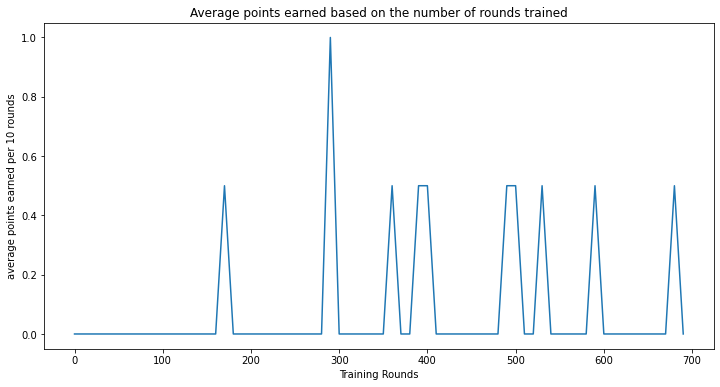

In [45]:
file_name = 'scores.csv'
path = "analytics/scores/" + q_path.replace("csv", "txt")

csv = pd.read_csv(path, index_col=0)
csv = csv.reset_index()
csv = csv.drop('index', axis='columns')

print(f"training epochs: {csv.shape[0]}")
ls = [csv.iloc[i] for i in range(csv.shape[0])]
#plot_points(x=np.arange(0, csv.shape[0], 1), y=ls) #actual points
x, y = compute_x_y(csv)
plot_points(x,y)


approx

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(x, a, b):
    return a * np.exp(-b * x)


x = np.linspace(0, 4, 50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)



plt.figure(figsize=(10,6))
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


TypeError: func() takes 3 positional arguments but 4 were given

In [73]:
import scipy

In [82]:
np.exp(0.7)

2.0137527074704766

R² = 1.0
Y = 0.99899999989851 * e^(-0.010000000005584054 * x) + 1.3676904040531653e-10
Tau = 4999.999997207973 µs


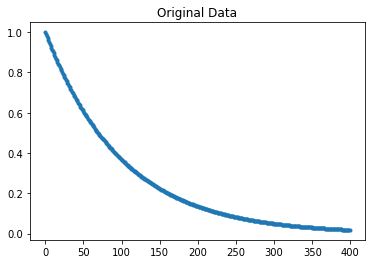

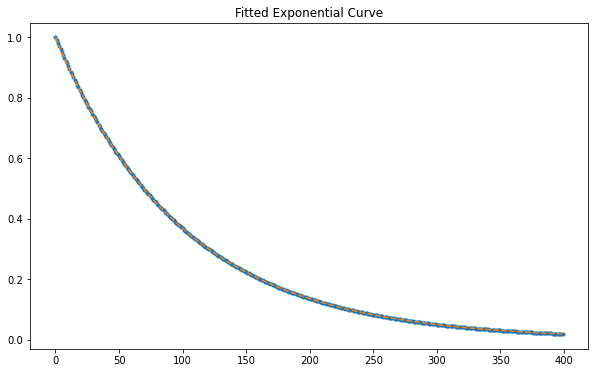

In [115]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b


xs = np.arange(400)
ys = [0.999*np.exp(-val*0.01) for val in range(400)]



plt.plot(xs, ys, '.')
plt.title("Original Data")

# perform the fit
p0 = (2000, .1, 50)  # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys)
m, t, b = params
sampleRate = 20_000  # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")


Manhattan distance

In [173]:
from scipy.spatial.distance import cityblock

#define vectors
A = list((-2.0, 6.0, 1.0, 0.0, 0.0, 1.0, -2.0, 0.0, 100.0, 100.0))
b = list((-2.0, 6.0, 1.0, 0.0, 0.0, 1.0, -2.0, 0.0, 0.0, 0.0))
GOAL = list((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
GOAL2 = list((0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))


#calculate Manhattan distance between vectors
dist = cityblock(GOAL, A)
dist2 = cityblock(GOAL, b)
print(f"before: {dist}, and {dist2}")

dist = cityblock(GOAL2, GOAL, w=[1, 1, 0, 0, 0, 0, 3, 3, 4, 4])
dist2 = cityblock(GOAL, b, w=[1, 1, 1, 1, 1, 1, 2, 2, 3, 3])

Fi = -dist / 0.8
Fi2 = -dist2 / 0.8
print(f"F1: {Fi}")
print(f"F2: {Fi2}")


before: 212.0, and 12.0
F1: -0.0
F2: -17.5


train ooo


In [48]:
q_t = {}

coin_x, coin_y = list(np.arange(0, 5, 1)), list(np.arange(0, 5, 1))
left, right, up, down = [0, 1], [0, 1], [0, 1], [0, 1]
crate_x, crate_y = list(np.arange(0, 7, 1)), list(np.arange(0, 7, 1))
bomb_x, bomb_y = list(np.arange(0, 6, 1)), list(np.arange(0, 6, 1))

keys = list(itertools.product(coin_x, coin_y, left,
              right, up, down, crate_x, crate_y, bomb_x, bomb_y))
print(len(keys))

keys[:5]


705600


[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 2),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 4)]

In [51]:
for key in keys:
    value = q_t_initialization(key) 
    q_t[key] = value

In [52]:
key = keys[132530]
print(key)
q_t[key]


(0, 4, 1, 0, 1, 1, 0, 6, 2, 2)


array([100.,   0., 100., 100.,   0.,   0.])

In [53]:
with open("data/q_table-PREInitialization.csv", "wb") as file:
    pickle.dump(q_t, file)


In [50]:
def q_t_initialization(state):
    new_row = np.zeros(6)

    coin_x, coin_y = state[0:2]
    left, right, up, down = state[2:6]
    crate_x, crate_y = state[6:8]
    bomb_x, bomb_y = state[8:10]

    if bomb_x != 0 and bomb_y != 0:
        for i, move in enumerate([up, right, down, left]):
            # can move to this direction
            if move == 1:
                new_row[i] = 100

    if bomb_x != 0 and bomb_y == 0:
        for i, move in enumerate([up, 0, down, 0]):
            if move == 1:
                new_row[i] = 100

    if bomb_x == 0 and bomb_y != 0:
        for i, move in enumerate([0, right, 0, left]):
            # can move to this direction
            if move == 1:
                new_row[i] = 100

    if bomb_x == 0 and bomb_y == 0:
        # coins
        if coin_x != 0 and coin_y == 0:
            for i, move in enumerate([up, 0, down, 0]):
                if move == 1:
                    new_row[i] = 50
        if coin_x == 0 and coin_y != 0:
            for i, move in enumerate([0, right, 0, left]):
                # can move to this direction
                if move == 1:
                    new_row[i] = 50
        if coin_x != 0 and coin_y != 0:
            for i, move in enumerate([up, right, down, left]):
                # can move to this direction
                if move == 1:
                    new_row[i] = 50

        # crates
        else:
            if crate_x != 0 and crate_y == 0:
                for i, move in enumerate([up, 0, down, 0]):
                    if move == 1:
                        new_row[i] = 30
            if crate_x == 0 and crate_y != 0:
                for i, move in enumerate([0, right, 0, left]):
                    # can move to this direction
                    if move == 1:
                        new_row[i] = 30
            if crate_x != 0 and crate_y != 0:
                for i, move in enumerate([up, right, down, left]):
                    # can move to this direction
                    if move == 1:
                        new_row[i] = 30

    return new_row


PCA

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv(
    '/Users/angelinabasova/bomberman_rl/agent_code/OWN/TD.csv', header=None)
print(df.shape)

df_clean = df.drop_duplicates()
df_c = df_clean.reset_index(drop=True)


df_c.to_csv(
    '/Users/angelinabasova/bomberman_rl/agent_code/OWN/TD_non_duplicate.csv')
df_c
data = df_c.to_numpy()

data = StandardScaler().fit_transform(data)

pca = PCA(n_components=0.95).fit(data)
reduced = pca.transform(data)

print("Shape after PCA: ", reduced.shape)

plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, 38, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
# change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, 40, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()
reduced[3]

test = np.array([0.45914873,  0.19405837,  2.63515525,  1.34433142, -0.41451839,
                 -0.43510851,  1.59364941, -0.15853712, -0.41292084, -0.2988862,
                 0.0902997, -0.03389423, -0.19783136,  0.05835278, -0.11261372,
                 0.23766401,  0.38740795, -0.69633493,  0.8515969,  0.01799596,
                 -0.51113631, -0.88157413,  2.07341043,  2.01515241,  0.31926949,
                 0.2335254,  0.76769847, -0.28289524,  0.4042563, -0.0945597,
                 -0.57767953,  1.36608969,  4.16456593, -0.50406059, -1.57587462,
                 -0.15152042, -0.57306101])

print(type(reduced[3]))
np.all(reduced[3] == test, axis=0)


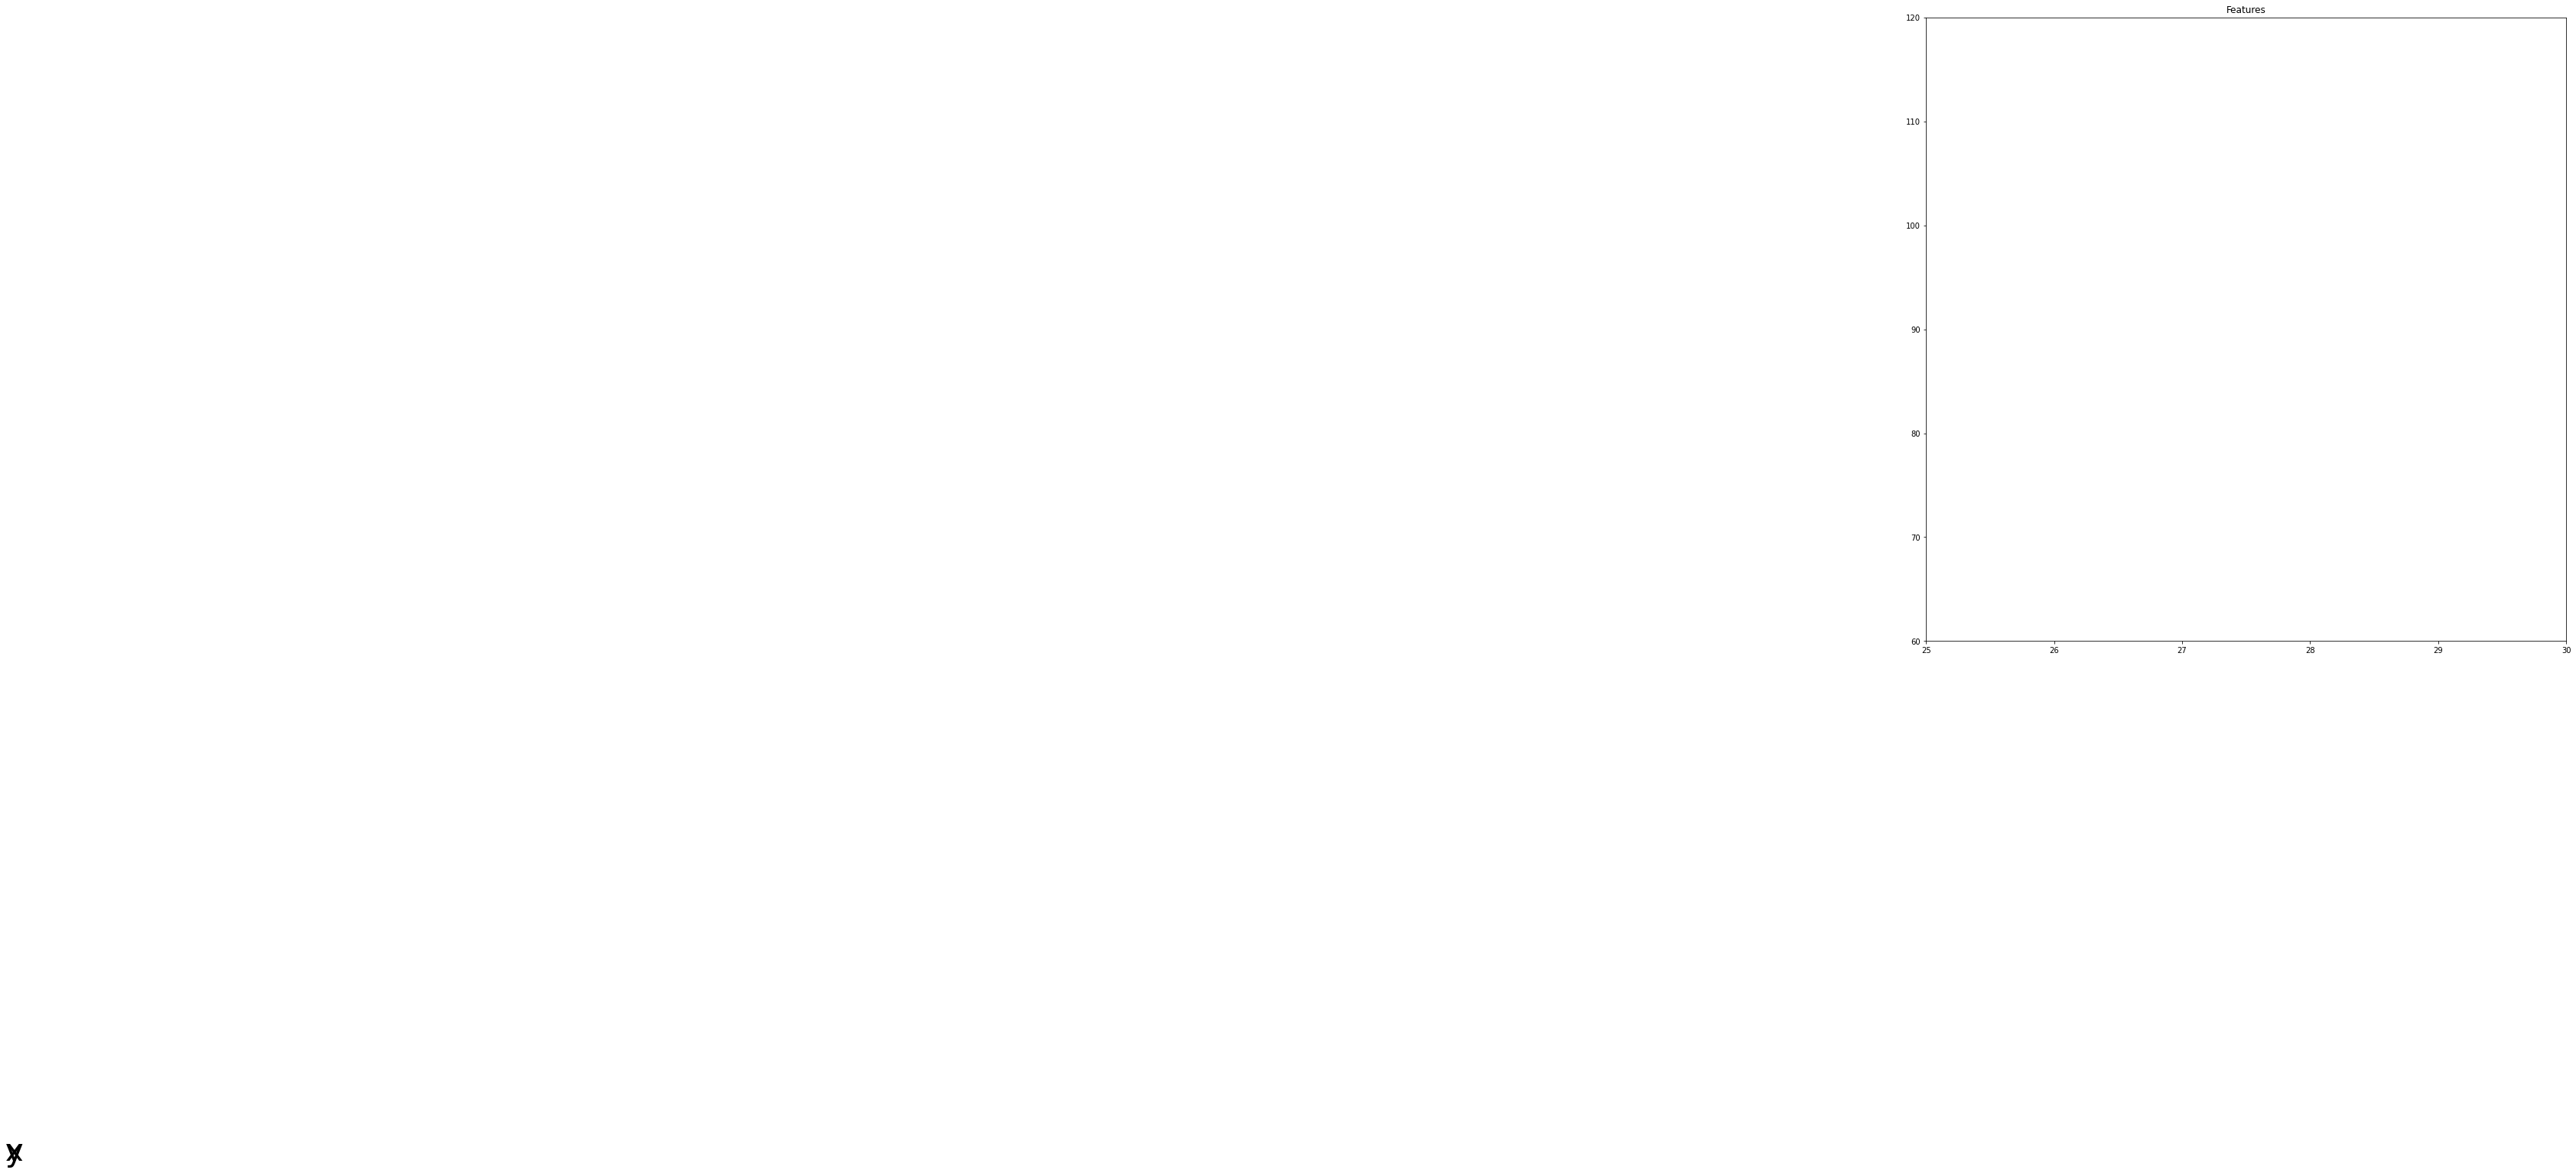

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(25, 30)
ax.set_ylim(60, 120)
for value in ['x','y']:
    ax.text(10, 10, value, fontsize=40)
plt.title('Features')
plt.show()
